In [64]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('ggplot')

import nltk

In [65]:
#Read the Dataset 
df = pd.read_excel('/kaggle/input/udemy-review/Udemy review.xlsx')

In [66]:
df.head()

,course_id,review_id,review_title,review_content,review_rating,review_created,review_modified
0,3701752,95068444,NaN,NaN,5.0,2021-09-09T14:56:26Z,2021-09-10T16:03:43Z
1,3701752,78858128,NaN,NaN,5.0,2021-02-27T09:25:46Z,2021-02-28T19:08:43Z
2,3701752,73928174,NaN,NaN,5.0,2020-12-30T05:38:34Z,2020-12-31T15:06:33Z
3,3701752,73551404,NaN,NaN,5.0,2020-12-25T10:40:56Z,2020-12-26T15:06:34Z
4,3702930,91764932,NaN,NaN,4.0,2021-07-31T18:37:57Z,2021-08-01T16:06:37Z


In [67]:
print(df.shape)

(58408, 7)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58408 entries, 0 to 58407
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   course_id        58408 non-null  int64  
 1   review_id        58408 non-null  int64  
 2   review_title     0 non-null      float64
 3   review_content   14504 non-null  object 
 4   review_rating    58408 non-null  float64
 5   review_created   58408 non-null  object 
 6   review_modified  58408 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 3.1+ MB


## Cleaning Data

In [69]:
df.isnull().sum()

course_id              0
review_id              0
review_title       58408
review_content     43904
review_rating          0
review_created         0
review_modified        0
dtype: int64

In [70]:
df1 = df.drop('review_title', axis=1)

In [71]:
df1.isnull().sum()

course_id              0
review_id              0
review_content     43904
review_rating          0
review_created         0
review_modified        0
dtype: int64

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58408 entries, 0 to 58407
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   course_id        58408 non-null  int64  
 1   review_id        58408 non-null  int64  
 2   review_content   14504 non-null  object 
 3   review_rating    58408 non-null  float64
 4   review_created   58408 non-null  object 
 5   review_modified  58408 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ MB


In [73]:
df = df1.dropna()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14504 entries, 15 to 58407
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   course_id        14504 non-null  int64  
 1   review_id        14504 non-null  int64  
 2   review_content   14504 non-null  object 
 3   review_rating    14504 non-null  float64
 4   review_created   14504 non-null  object 
 5   review_modified  14504 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 793.2+ KB


### Quick EDA

Text(0.5, 0, 'Review Stars')

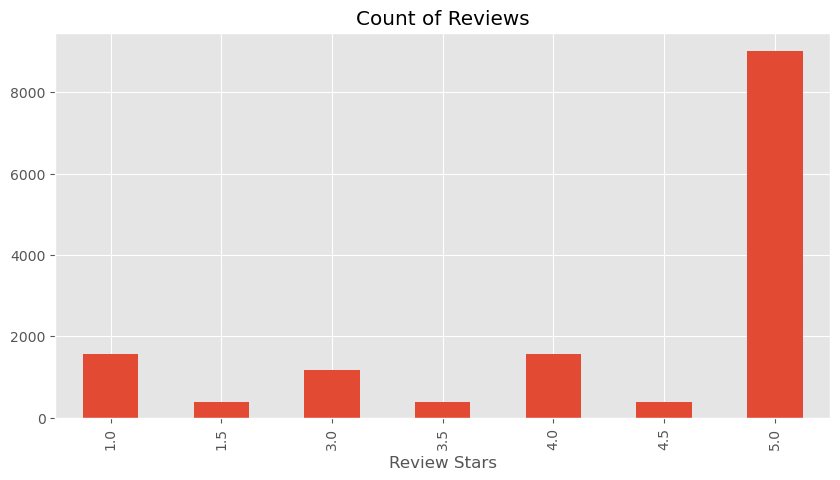

In [75]:
ax = df['review_rating'].value_counts().sort_index() \
.plot(kind='bar',title='Count of Reviews', figsize=(10,5))
ax.set_xlabel('Review Stars')

## VADER Sentiment Scoring
This uses "bag of words" approach:


1. Stop words are removed

2. each word is scored and combined to a total score

In [76]:
from nltk.sentiment import SentimentIntensityAnalyzer 
from tqdm.notebook import tqdm

sia =  SentimentIntensityAnalyzer()

In [77]:
sia.polarity_scores('The course was excellent')

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

In [78]:
#Run the polarity score on the entire dataset 
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_content']
    course_id = row['course_id']
    res[course_id] = sia.polarity_scores(text)

  0%|          | 0/14504 [00:00<?, ?it/s]

In [79]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'course_id'})
vaders = vaders.merge(df, how='left')

In [80]:
vaders

,course_id,neg,neu,pos,compound,review_id,review_content,review_rating,review_created,review_modified
0,3703210,0.0,0.176,0.824,0.6892,95368032,Great Course!!,5.0,2021-09-13T21:16:57Z,2021-09-14T16:01:12Z
1,3703210,0.0,0.176,0.824,0.6892,95368032,Great Course!!,5.0,2021-09-13T21:16:57Z,2021-09-14T16:01:12Z
2,3703210,0.0,0.176,0.824,0.6892,95368032,Great Course!!,5.0,2021-09-13T21:16:57Z,2021-09-14T16:01:12Z
3,3703210,0.0,0.176,0.824,0.6892,95368032,Great Course!!,5.0,2021-09-13T21:16:57Z,2021-09-14T16:01:12Z
4,3703210,0.0,0.176,0.824,0.6892,95368032,Great Course!!,5.0,2021-09-13T21:16:57Z,2021-09-14T16:01:12Z
...,...,...,...,...,...,...,...,...,...,...
14499,3684408,0.0,0.577,0.423,0.9368,75740872,This is truly unique and amazing course on dev...,5.0,2021-01-20T02:54:33Z,2021-01-21T15:04:59Z
14500,3684408,0.0,0.577,0.423,0.9368,76052120,The course is very helpful and in detailed to ...,5.0,2021-01-23T23:36:11Z,2021-01-25T15:05:00Z
14501,3684408,0.0,0.577,0.423,0.9368,75740872,This is truly unique and amazing course on dev...,5.0,2021-01-20T02:54:33Z,2021-01-21T15:04:59Z
14502,3684408,0.0,0.577,0.423,0.9368,76052120,The course is very helpful and in detailed to ...,5.0,2021-01-23T23:36:11Z,2021-01-25T15:05:00Z


## Plot VADER results

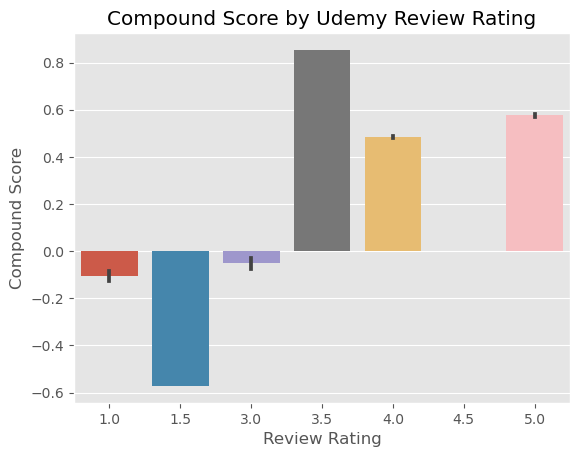

In [81]:
ax = sns.barplot(data=vaders, x='review_rating', y='compound')
ax.set_title('Compound Score by Udemy Review Rating')
ax.set_xlabel('Review Rating')
ax.set_ylabel('Compound Score')
plt.show()

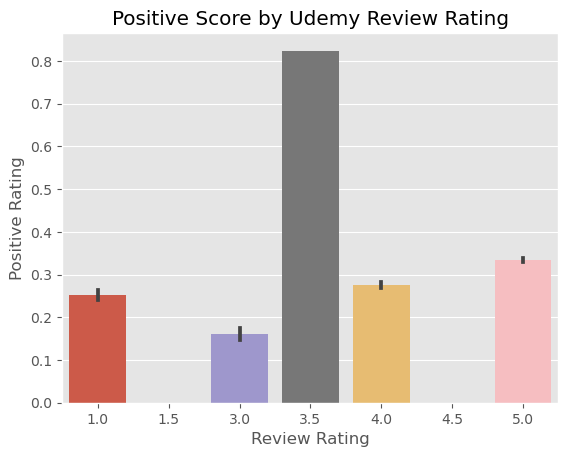

In [82]:
ax = sns.barplot(data=vaders, x = 'review_rating', y = 'pos')
ax.set_xlabel('Review Rating')
ax.set_ylabel('Positive Rating')
ax.set_title('Positive Score by Udemy Review Rating')
plt.show()

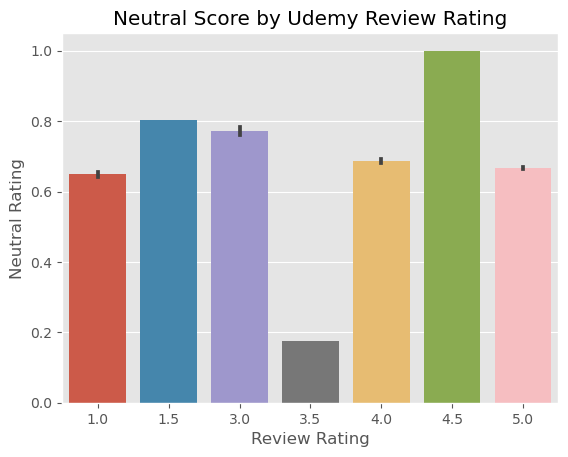

In [83]:
ax = sns.barplot(data=vaders, x = 'review_rating', y = 'neu')
ax.set_xlabel('Review Rating')
ax.set_ylabel('Neutral Rating')
ax.set_title('Neutral Score by Udemy Review Rating')
plt.show()

Text(0.5, 1.0, 'Negetive Score by Review Rating')

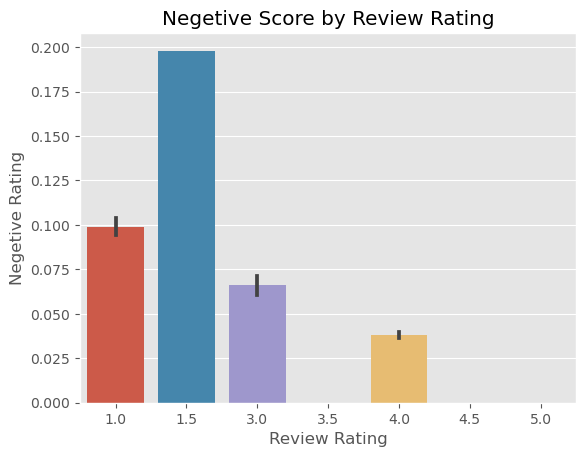

In [84]:
ax = sns.barplot(data = vaders, x = 'review_rating', y='neg')
ax.set_xlabel("Review Rating")
ax.set_ylabel("Negetive Rating")
ax.set_title('Negetive Score by Review Rating')

## All in One plot Positive, Neutral and Negetive reviews

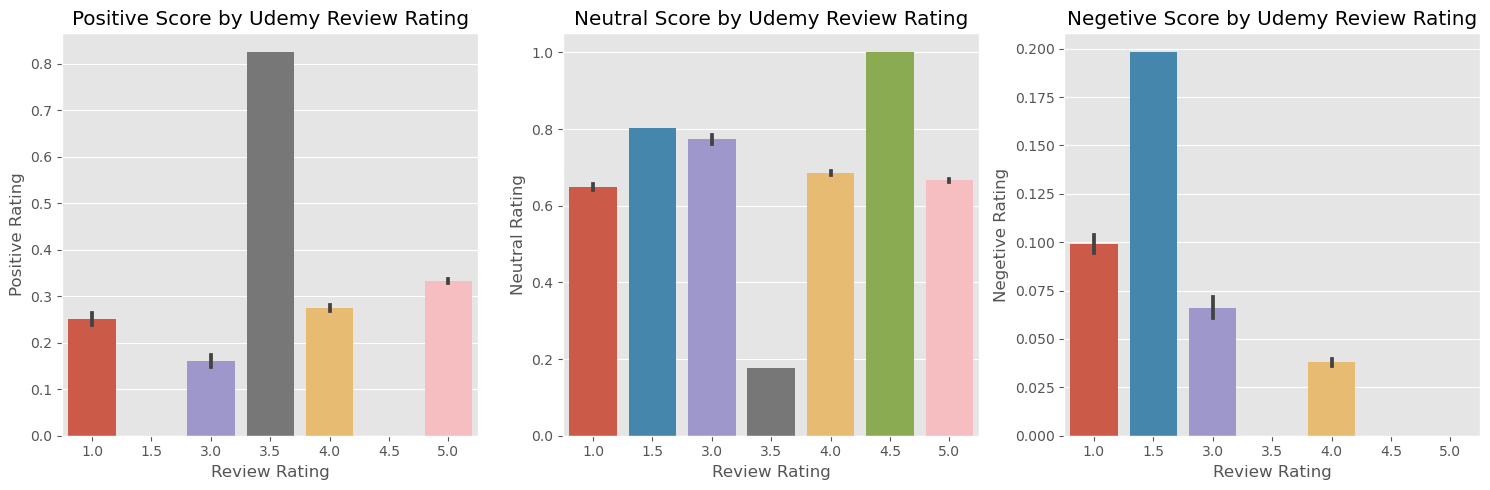

In [85]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x = 'review_rating', y = 'pos',ax= axs[0] )
sns.barplot(data=vaders, x = 'review_rating', y = 'neu', ax= axs[1])
sns.barplot(data = vaders, x = 'review_rating', y='neg', ax= axs[2])
axs[0].set_xlabel('Review Rating')
axs[0].set_ylabel('Positive Rating')
axs[0].set_title('Positive Score by Udemy Review Rating')
axs[1].set_xlabel('Review Rating')
axs[1].set_ylabel('Neutral Rating')
axs[1].set_title('Neutral Score by Udemy Review Rating')
axs[2].set_xlabel('Review Rating')
axs[2].set_ylabel('Negetive Rating')
axs[2].set_title('Negetive Score by Udemy Review Rating')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model

* Use a model trained of a large corpus of data
* Transformer model accounts for the words but also the context related to other words

In [86]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [87]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [88]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review_content']
        myid = row['course_id']
        roberta_result = polarity_scores_roberta(text)
    except RuntimeError:
        print(f'Broke for id {course_id}')

  0%|          | 0/14504 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'course_id'})
results_df = results_df.merge(df, how = 'left')
result_df